# **Proyecto entrega primer corte**
## Carlos Fernando Gozalez Sarmiento
## Juan Felipe Herrera Rodriguez
## Grupo 3

# Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

La base fue sacada del siguiente link:

__[[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020](https://data.seoul.go.kr/index.do)__

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DEMANDA DE BICICLETAS COMPARTIDAS DE SEÚL**
El conjunto de datos contiene el recuento de bicicletas públicas alquiladas cada hora en el sistema de alquiler de bicicletas de Seúl, desde el 1 de diciembre del 2017 hasta el 30 de noviembre del 2018, con los datos meteorológicos correspondientes y la información si era temporada de vacaciones o no. 
Cabe mencionar que esta base proviene del área comercial y de la ciencia. 

#Características de las variables
Nuestro conjunto de datos contiene 13 variables, las cuales son: recuento de bicicletas alquiladas (número de bicicletas alquiladas por hora-tipo discreta), hora (hora del día-tipo discreta), temperatura (Celsius-tipo continua), humedad (%-tipo discreta), velocidad del viento (m/s-tipo continua), visibilidad (10m-tipo discreta), temperatura de punto de rocío (Celsius-tipo continua), radiación solar (MJ/ m2-tipo continua), nevadas (cm-tipo continua), precipitaciones (mm-tipo continua), estaciones (invierno, otoño, primavera y verano-tipo categórica), vacaciones (si/no-categórica) y dia de funcionamiento (hora funcional/hora no funcional-categórica). 


#Escenarios en minería de datos
Para nuestro conjunto de datos se tiene un problema de aprendizaje supervisado, puesto que se conocen las etiquetas de cada variable y se pueden establecer relaciones de acuerdo a las características entre ellas. 
Por otro lado, se tiene una tarea de regresión, dado que se busca estimar el número de rentas de bicicletas en Seúl con base a las demás variables.

In [178]:
df_bikes = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', 
                 sep = ';',
                 error_bad_lines=False
                 )
df_bikes.head()

,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df_bikes.shape

(8760, 13)

Existen 8760 observaciones

In [ ]:
df_bikes.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(?C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(?C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No existe ningún valor faltante

In [ ]:
df_bikes.value_counts

<bound method DataFrame.value_counts of       Rented Bike Count  Hour  Temperature(?C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43          

In [ ]:
df_bikes.describe()

,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Medidas resumen para algunas variables

# Gráfico de barras

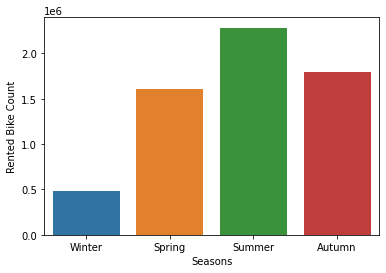

In [140]:
sns.barplot(data = df_bikes,
            estimator = sum,
            x = "Seasons", 
            y = "Rented Bike Count",
            ci = None,main="") 

Se evidencia que el alquiler de bicicletas se hace en mayor numero, en verano y en menor numero en invierno

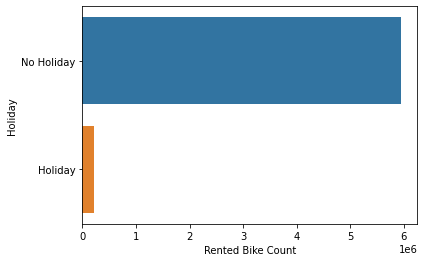

In [182]:
sns.barplot(data = df_bikes,
            estimator = sum,
            x = "Rented Bike Count", 
            y = "Holiday",
            ci = None)

Este gráfico nos da a entender que existe una mayor tendencia a rentar bicicletas en dias no festivos.

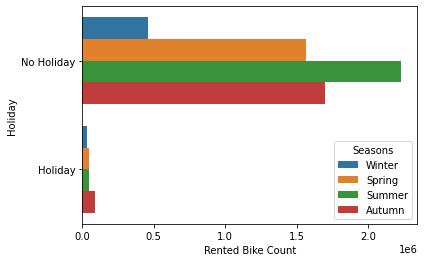

In [180]:
sns.barplot(data = df_bikes,
            estimator = sum,
            x = "Rented Bike Count", 
            y = "Holiday",
            hue="Seasons",
            ci = None) #se aconseja dejar el ci igual none

Haciendo el gráfico para estaciones del año nos damos cuenta que hay una mayor demanda en la renta de bicicletas para dias festivos en la temporada de otoño y para dias no festivo hay mayor renta de bicicletas en la temporada de verano. 

In [ ]:
a1=(df_bikes['Hour']==1)==True
a2=(df_bikes['Hour']==2)==True
a3=(df_bikes['Hour']==3)==True
a4=(df_bikes['Hour']==4)==True
a5=(df_bikes['Hour']==5)==True
a6=(df_bikes['Hour']==6)==True
a7=(df_bikes['Hour']==7)==True
a8=(df_bikes['Hour']==8)==True
a9=(df_bikes['Hour']==9)==True
a10=(df_bikes['Hour']==10)==True
a11=(df_bikes['Hour']==11)==True
a12=(df_bikes['Hour']==12)==True
a13=(df_bikes['Hour']==13)==True
a14=(df_bikes['Hour']==14)==True
a15=(df_bikes['Hour']==15)==True
a16=(df_bikes['Hour']==16)==True
a17=(df_bikes['Hour']==17)==True
a18=(df_bikes['Hour']==18)==True
a19=(df_bikes['Hour']==19)==True
a20=(df_bikes['Hour']==20)==True
a21=(df_bikes['Hour']==21)==True
a22=(df_bikes['Hour']==22)==True
a23=(df_bikes['Hour']==23)==True
a0=(df_bikes['Hour']==0)==True


In [ ]:
b1=df_bikes[a1]
b2=df_bikes[a2]
b3=df_bikes[a3]
b4=df_bikes[a4]
b5=df_bikes[a5]
b6=df_bikes[a6]
b7=df_bikes[a7]
b8=df_bikes[a8]
b9=df_bikes[a9]
b10=df_bikes[a10]
b11=df_bikes[a11]
b12=df_bikes[a12]
b13=df_bikes[a13]
b14=df_bikes[a14]
b15=df_bikes[a15]
b16=df_bikes[a16]
b17=df_bikes[a17]
b18=df_bikes[a18]
b19=df_bikes[a19]
b20=df_bikes[a20]
b21=df_bikes[a21]
b22=df_bikes[a22]
b23=df_bikes[a23]
b0=df_bikes[a0]

In [183]:
b0['Rented Bike Count'].sum()# numero de bicicletas rentadas a las 12 am

197633

In [184]:
b=df_bikes[a]

In [186]:
df_bikes['Rented Bike Count'].sum()# numero total de bicicletas rentadas en la base

6172314

Text(0, 0.5, 'Frecuencia')

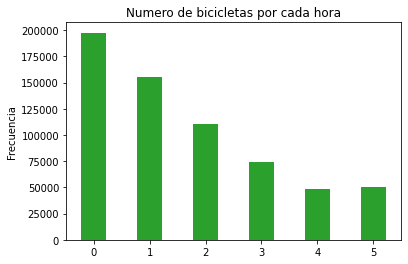

In [ ]:

s = ["0","1","2","3","4","5"]
m = [b0['Rented Bike Count'].sum(),b1['Rented Bike Count'].sum(),b2['Rented Bike Count'].sum(),b3['Rented Bike Count'].sum(),b4['Rented Bike Count'].sum(),b5['Rented Bike Count'].sum()]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Numero de bicicletas por cada hora")
plt.ylabel("Frecuencia")

In [191]:
b0['Rented Bike Count'].sum()

197633

Para esta comparación de graficos de barra, se usarán de a 6 horas para verificar cual es la que mayor renta de bicicletas tiene y luego comparar las mas altas de cada serie.

Para este caso el mayor numero de bicicletas rentadas es para las 12 am con 197633.

Text(0, 0.5, 'Frecuencia')

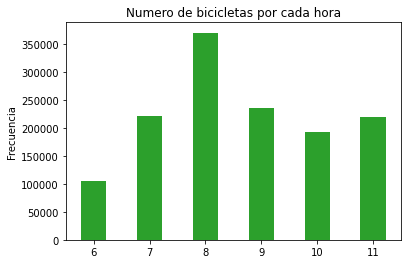

In [ ]:
s = ["6","7","8","9","10","11"]
m = [b6['Rented Bike Count'].sum(),b7['Rented Bike Count'].sum(),b8['Rented Bike Count'].sum(),b9['Rented Bike Count'].sum(),b10['Rented Bike Count'].sum(),b11['Rented Bike Count'].sum()]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Numero de bicicletas por cada hora")
plt.ylabel("Frecuencia")

In [187]:
b8['Rented Bike Count'].sum()

370731

En este caso el mayor numero de bicicletas rentadas es para las 8 am con 370731 bicicletas.

Text(0, 0.5, 'Frecuencia')

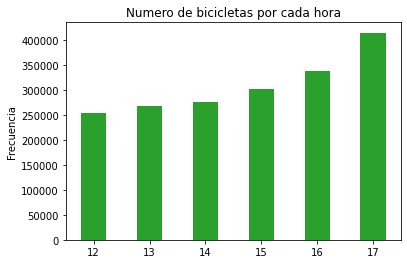

In [ ]:
s = ["12","13","14","15","16","17"]
m = [b12['Rented Bike Count'].sum(),b13['Rented Bike Count'].sum(),b14['Rented Bike Count'].sum(),b15['Rented Bike Count'].sum(),b16['Rented Bike Count'].sum(),b17['Rented Bike Count'].sum()]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Numero de bicicletas por cada hora")
plt.ylabel("Frecuencia")

In [188]:
b17['Rented Bike Count'].sum()

415556

Para este gráfico es la hora 17 o 5 pm siendo 415556 bicicletas rentadas.

Text(0, 0.5, 'Frecuencia')

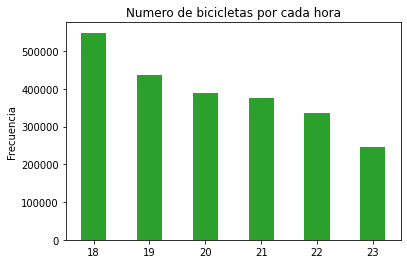

In [ ]:
s = ["18","19","20","21","22","23"]
m = [b18['Rented Bike Count'].sum(),b19['Rented Bike Count'].sum(),b20['Rented Bike Count'].sum(),b21['Rented Bike Count'].sum(),b22['Rented Bike Count'].sum(),b23['Rented Bike Count'].sum()]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Numero de bicicletas por cada hora")
plt.ylabel("Frecuencia")

In [189]:
b18['Rented Bike Count'].sum()

548568

En estas comparaciones la hora que posee mayor renta de bicicletas es a la hora 18 o 6 pmcon 548564.

Text(0, 0.5, 'Frecuencia')

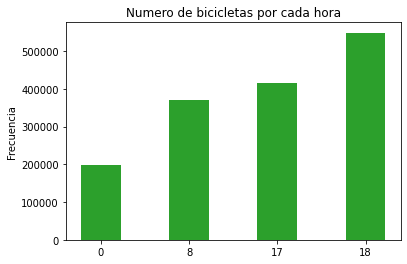

In [ ]:
s = ["0","8","17","18",]
m = [b0['Rented Bike Count'].sum(),b8['Rented Bike Count'].sum(),b17['Rented Bike Count'].sum(),b18['Rented Bike Count'].sum()]
plt.bar(s,m,color='tab:green',width=0.45)
plt.title("Numero de bicicletas por cada hora")
plt.ylabel("Frecuencia")

En este caso la hora que mas renta bicicletas en todas las comparaciones es las 6 pm reiterando que es 548568.

In [ ]:
b18['Rented Bike Count'].sum()

548568

In [ ]:
b18['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100

8.88755821560601

In [ ]:
df_bikes['Rented Bike Count'].sum()

6172314

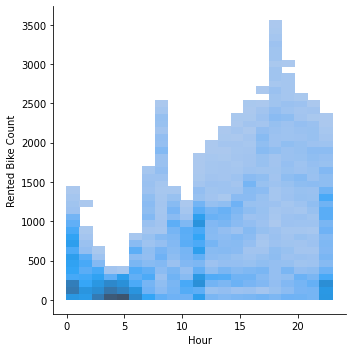

In [ ]:
sns.displot(df_bikes,y="Rented Bike Count",x="Hour")

En este gráfico se puede comparar de una manera mas visual pero no tan exacta las rentas de las bicicletas para cada hora, se confirma que la hora 18 es la mas alta.

In [192]:
z0=b0['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z1=b1['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z2=b2['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z3=b3['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z4=b4['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z5=b5['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z6=b6['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z7=b7['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z8=b8['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z9=b9['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z10=b10['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z11=b11['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z12=b12['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z13=b13['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z14=b14['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z15=b15['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z16=b16['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z17=b17['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z18=b18['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z19=b19['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z20=b20['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z21=b21['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z22=b22['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
z23=b23['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100


In [193]:
f1=(df_bikes['Seasons']=="Winter")==True
f2=(df_bikes['Seasons']=="Spring")==True
f3=(df_bikes['Seasons']=="Summer")==True
f4=(df_bikes['Seasons']=="Autumn")==True


In [194]:
f5=df_bikes[f1]
f6=df_bikes[f2]
f7=df_bikes[f3]
f8=df_bikes[f4]

In [195]:
f1=f5['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
f2=f6['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
f3=f7['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100
f4=f8['Rented Bike Count'].sum()/df_bikes['Rented Bike Count'].sum()*100

# Gráfico de torta

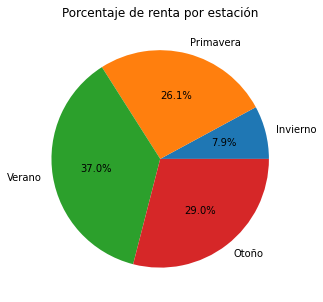

In [196]:
plt.figure(figsize=(5,5))
labels = ["Invierno","Primavera","Verano","Otoño"]
f=[f1,f2,f3,f4]

plt.pie(f, labels=labels, autopct='%1.1f%%')
plt.title('Porcentaje de renta por estación')
plt.show()

Nuevamente se evidencia que la estación en la que mas se rentan bicicletas es verano con un 37% para toda la base, seguido de otoño con 29% del total de rentas, continúa primavera con 26.1% y finaliza con la temporada con menos rentas de bicicletas que es invierno con 7.9%.

In [ ]:
z=[z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23]

In [137]:
for i in range(0,len(z)):
  z[i]=round(z[i],3)

In [138]:
z.sort()


# Radial bar

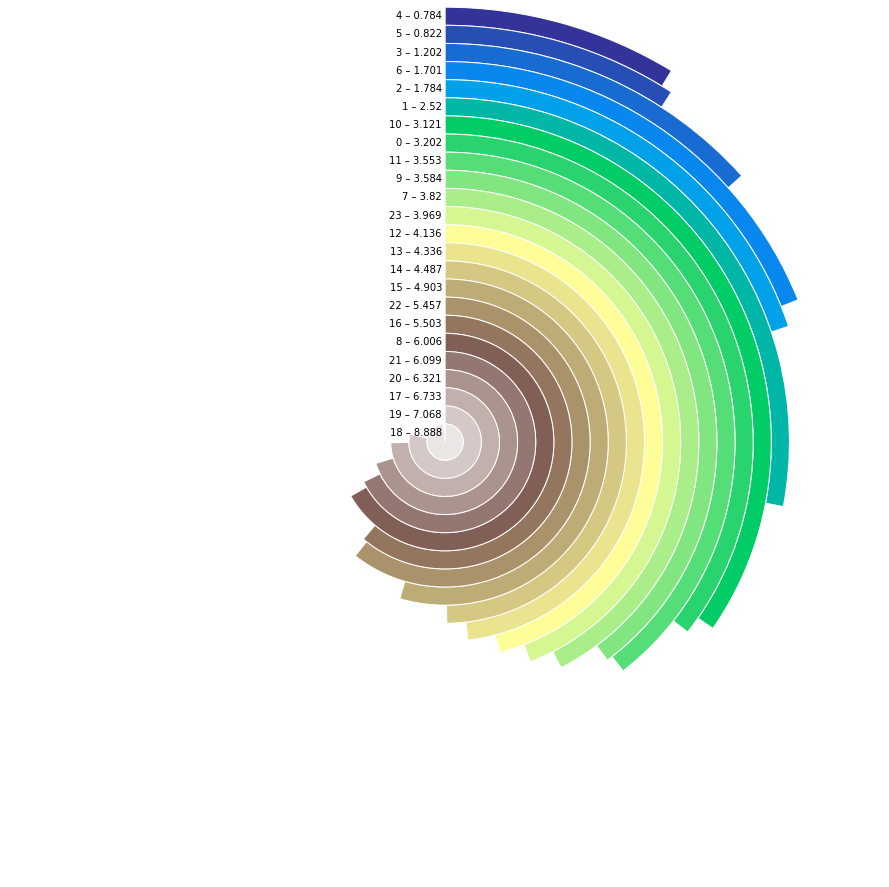

In [139]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10


labels = ["4","5","3","6","2","1","10","0","11","9","7","23","12","13","14","15","22","16","8","21","20","17","19","18"]
data = z
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
#plt.legend()
plt.show()

En el radial bar se puede evidenciar de manera mas eficiente el porcentaje de rentas de bicicletas por cada hora, siendo la de adentro la hora 18 o 6 pm la hora que mas porcentaje de rentas tiene con 8.88% de rentas y la de afuera es decir la hora 4 o 4 am la que menos porcentaje tien con un 0.784% de rentas.

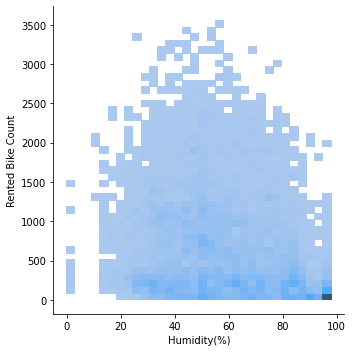

In [145]:
sns.displot(df_bikes,y="Rented Bike Count",x="Humidity(%)")

En este gráfico se evidencia que mientras menos % de humedad haya no es muy frecuente que la gente rente bicicletas, de 20% a 90% es mas normal y con un 100% tambien deja de ser frecuente.

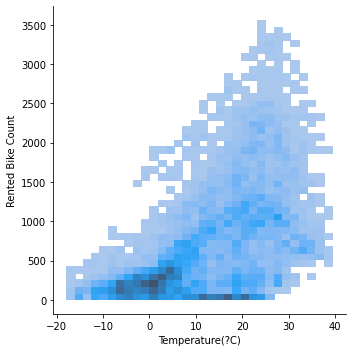

In [146]:
sns.displot(df_bikes,y="Rented Bike Count",x="Temperature(?C)")

Este gráfico demuestra que a menor temperatura menor es la renta de bicicletas, ya de los 10 grados en adelante es mas común la renta de bicicleetas hasta los 35 grados aproximadamente, luego vuelve a ser poco frecuente su uso.

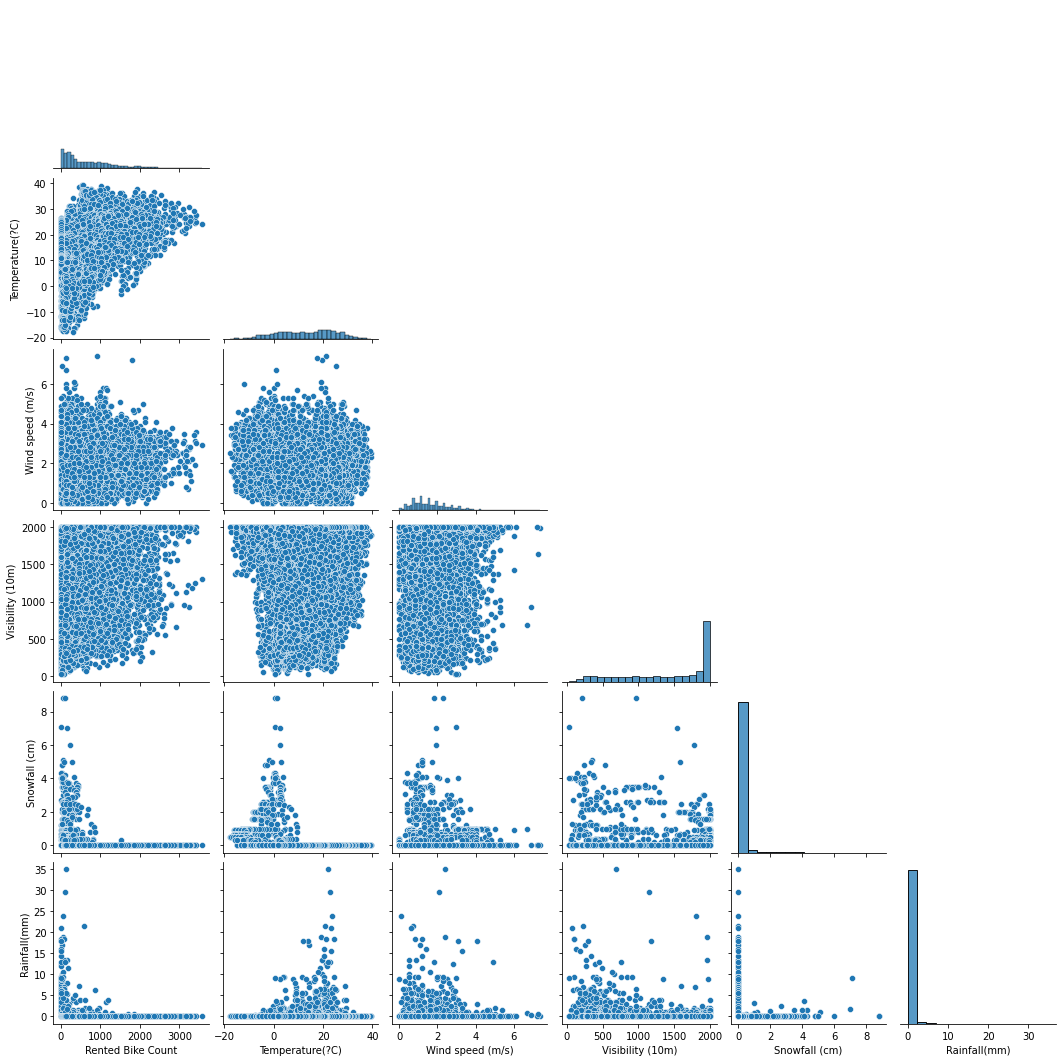

In [175]:
sns.pairplot(df_bikes[['Rented Bike Count','Temperature(?C)','Wind speed (m/s)','Visibility (10m)','Snowfall (cm)','Rainfall(mm)']],corner=True)

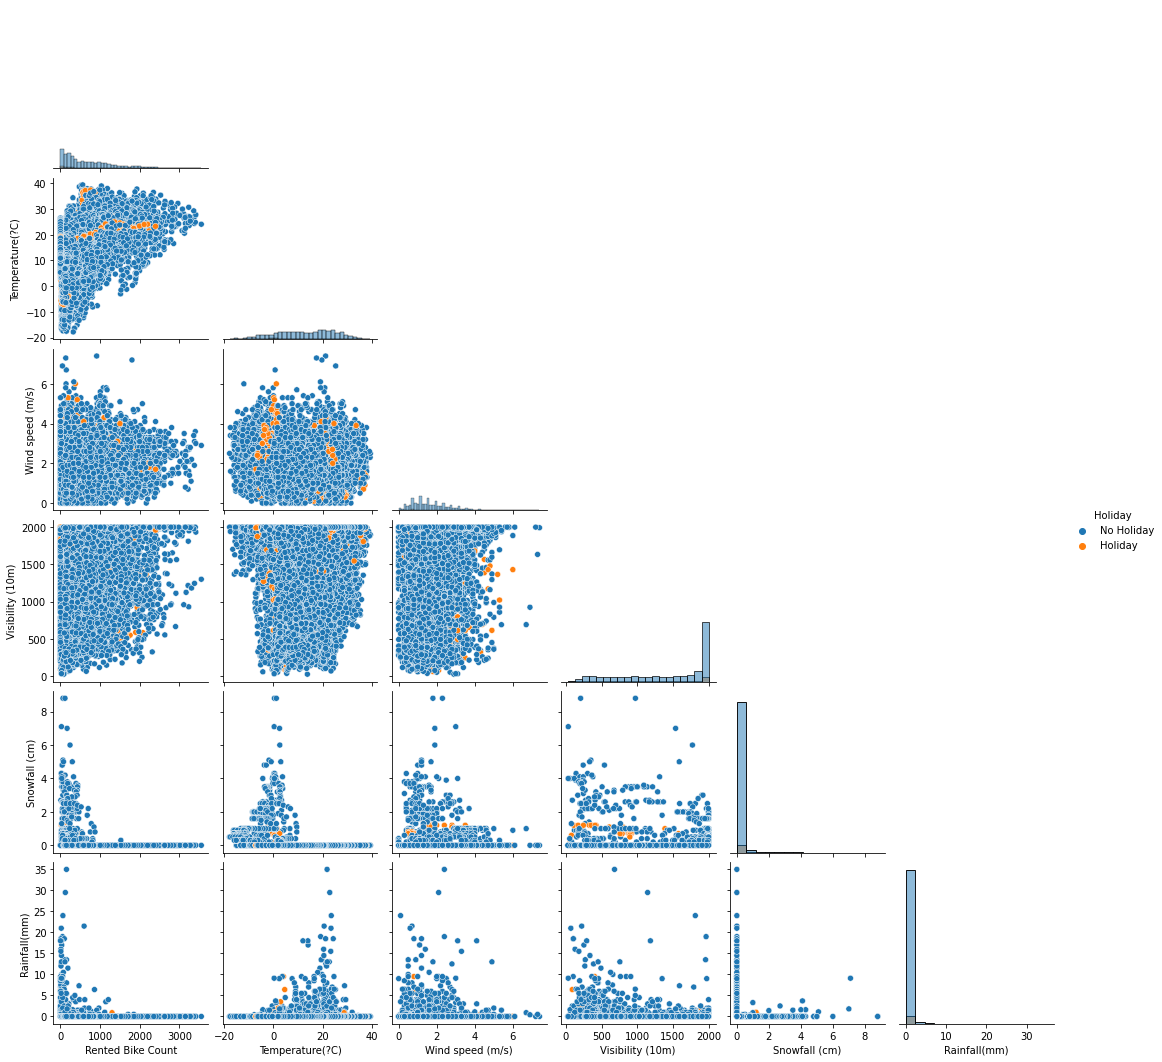

In [174]:
sns.pairplot(df_bikes[['Rented Bike Count','Temperature(?C)','Wind speed (m/s)','Visibility (10m)','Snowfall (cm)','Rainfall(mm)','Holiday']] ,hue='Holiday', diag_kind="hist",corner=True)

Ya que los dias festivos tiene una baja renta de bicicletas, la moyoría de los gráficos solo aparecen puntos azules, suendo estos, días no festivos, se ve que en variables que no tratamos anteriormente como por ejemplo la velocidad del viento, una vez supera los 6 m/s es muy rara la renta de bicicletas, en la visibilidad cuando existe 0 visibilidad, no se rentan bicicletas, de alli en adelante mientras mejora la visibilidad, se empiezan a rentar mas.

La altura de la nieve tambien influye, luego de 5 cm de altura, la gente dejar de rentar bicicletas por su dificl desplazamiento, finalmente la lluvia cuando sobrepasa 25 mm de agua en muy raro que se renten bicicletas.

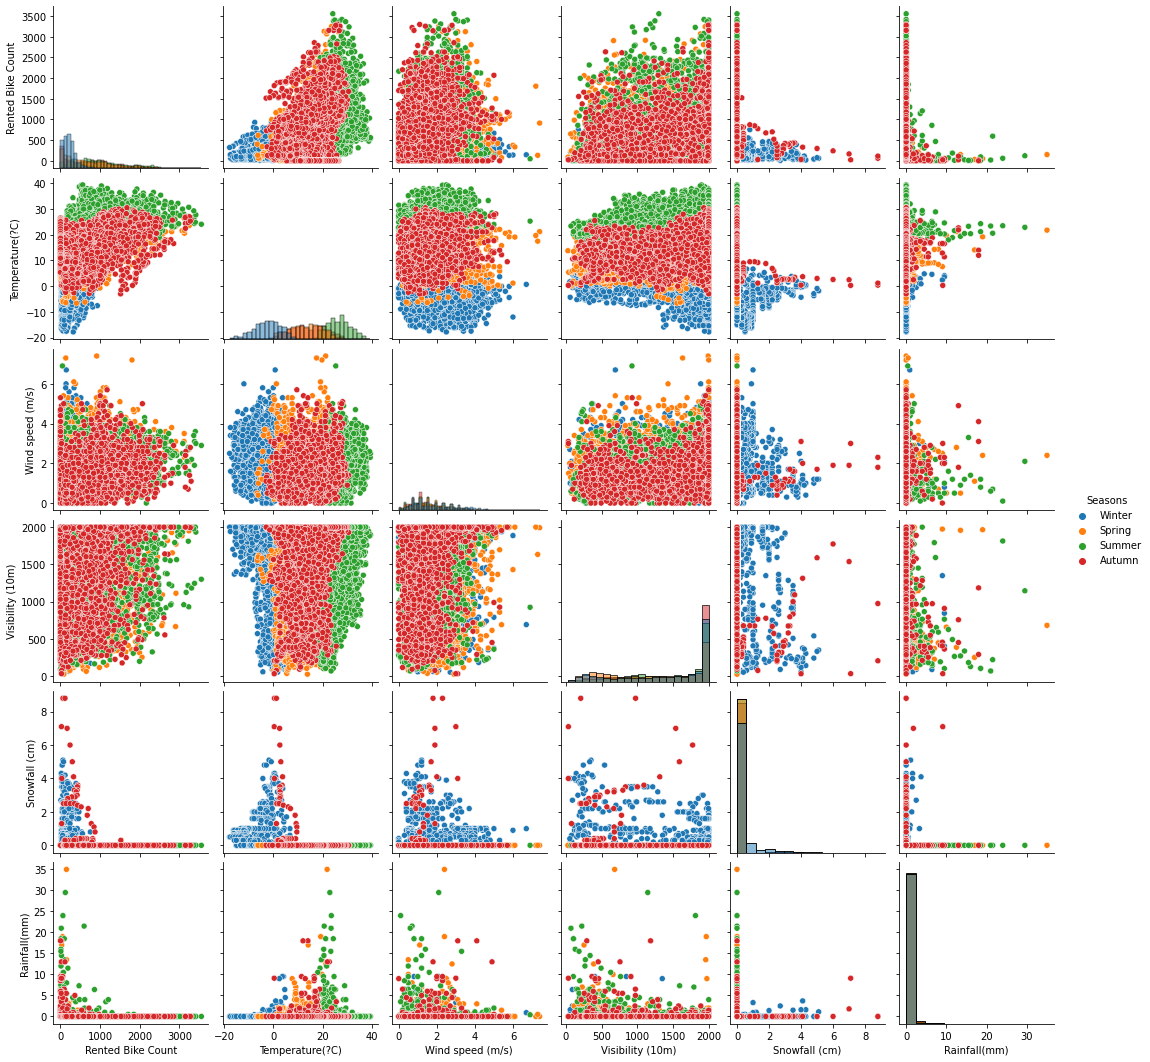

In [176]:
sns.pairplot(df_bikes[['Rented Bike Count','Temperature(?C)','Wind speed (m/s)','Visibility (10m)','Snowfall (cm)','Rainfall(mm)','Seasons']] ,hue='Seasons', diag_kind="hist",corner=False)

Este gráfico es basicamente lo mismo que el anterior pero ya separado por estaciones, siendo invierno la azul, primavera el naranja, verano el verde y otoño el rojo, ya deahí se nota que en bajas temperaturas solo se rentan bicicletas en invierno, entre otras.

# Conclusiones

Ya que miramos la mayoría de variables, vemos que las variables mas importantes para nuestro modelo de renta de bicicletas, las variables que mas afectan esto, son la temperatura, las horas, la velocidad del viento, la visbilidad, la nevada, la lluvia, si es dia festivo o no, y la temporada o estación.

Siendo estas respaldadas por los analisis hechos anteriormente.